In [1]:
import os
import glob
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import sklearn.metrics
import seaborn as sns
#import efficientnet.tfkeras as efn
from collections import Counter
from keras_preprocessing.image import ImageDataGenerator
from keras import models, layers, optimizers
from keras.models import  Model, Sequential
from keras.layers import Dense, Dropout, Flatten, Activation, GlobalAveragePooling2D, BatchNormalization, Concatenate
from keras.callbacks import EarlyStopping
from keras.layers.convolutional import Conv1D, Conv2D, MaxPooling2D
from keras.utils import np_utils
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import top_k_accuracy_score
from sklearn.metrics import roc_curve, auc, roc_auc_score

plt.style.use('ggplot')

In [2]:
tf.test.gpu_device_name()

'/device:GPU:0'

In [3]:
from tensorflow.keras.applications import DenseNet169

In [4]:
densenet169_conv = DenseNet169(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

for layer in densenet169_conv.layers:
    layer.trainable = True

for layer in densenet169_conv.layers:
    print(layer, layer.trainable)

model = models.Sequential()

model.add(densenet169_conv)

# Add new layers
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.2))
model.add(layers.Dense(13, activation='softmax'))

<keras.engine.input_layer.InputLayer object at 0x7fdbad156750> True
<keras.layers.convolutional.ZeroPadding2D object at 0x7fdbad156050> True
<keras.layers.convolutional.Conv2D object at 0x7fdbad029f50> True
<keras.layers.normalization.batch_normalization.BatchNormalization object at 0x7fdbad04e650> True
<keras.layers.core.activation.Activation object at 0x7fdba03da090> True
<keras.layers.convolutional.ZeroPadding2D object at 0x7fdbad156210> True
<keras.layers.pooling.MaxPooling2D object at 0x7fdba03b0d90> True
<keras.layers.normalization.batch_normalization.BatchNormalization object at 0x7fdba03b63d0> True
<keras.layers.core.activation.Activation object at 0x7fdba03c3350> True
<keras.layers.convolutional.Conv2D object at 0x7fdbad1562d0> True
<keras.layers.normalization.batch_normalization.BatchNormalization object at 0x7fdba03ce1d0> True
<keras.layers.core.activation.Activation object at 0x7fdba03573d0> True
<keras.layers.convolutional.Conv2D object at 0x7fdba03507d0> True
<keras.layer

In [5]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 densenet169 (Functional)    (None, 7, 7, 1664)        12642880  
                                                                 
 flatten (Flatten)           (None, 81536)             0         
                                                                 
 dense (Dense)               (None, 512)               41746944  
                                                                 
 batch_normalization (BatchN  (None, 512)              2048      
 ormalization)                                                   
                                                                 
 dense_1 (Dense)             (None, 128)               65664     
                                                                 
 batch_normalization_1 (Batc  (None, 128)              512       
 hNormalization)                                        

In [6]:
optimizer = tf.keras.optimizers.RMSprop(learning_rate=0.0001, rho=0.9)
model.compile(loss='categorical_crossentropy',optimizer=optimizer,metrics=['accuracy'])

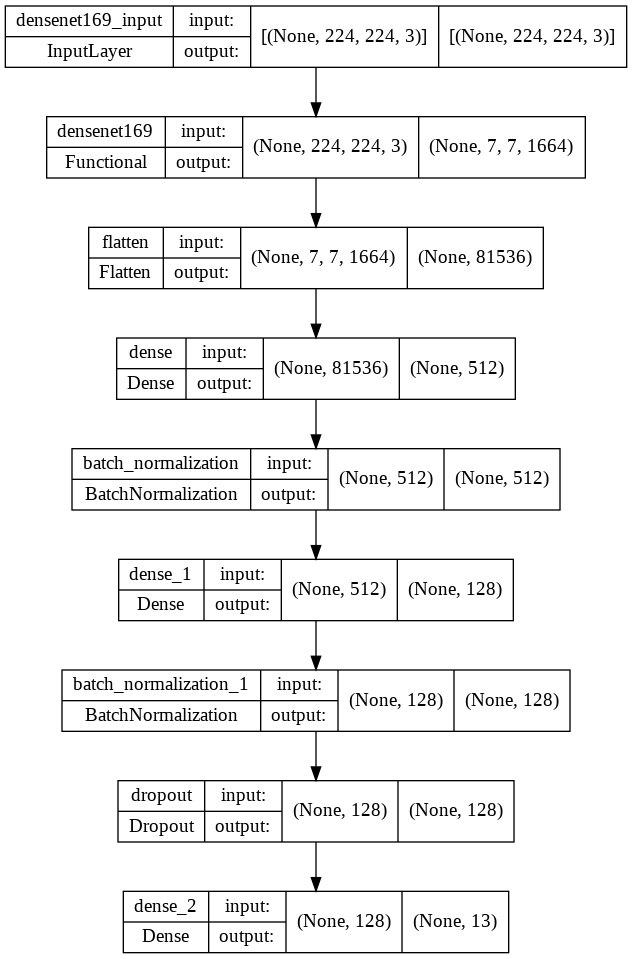

In [7]:
from keras.utils.vis_utils import plot_model

plot_model(model, show_shapes=True, show_layer_names = True)
from IPython.display import Image
Image(filename='model.png')

In [8]:
%matplotlib inline
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [9]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = False)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [10]:
training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/Birddata_split/New_8_1/train/',
                                                 target_size = (224, 224),
                                                 shuffle=True)

Found 10590 images belonging to 13 classes.


In [11]:
test_set = test_datagen.flow_from_directory('/content/drive/MyDrive/Birddata_split/New_8_1/val/',
                                            target_size = (224, 224), shuffle=False)

Found 1303 images belonging to 13 classes.


In [12]:
for cls, idx in training_set.class_indices.items():
    print('Class nr ',idx,' -> ', cls)

Class nr  0  ->  0Capri
Class nr  1  ->  10Pachy
Class nr  2  ->  12Phyll
Class nr  3  ->  14Macro
Class nr  4  ->  1Pnoep
Class nr  5  ->  2Malac
Class nr  6  ->  3Malac
Class nr  7  ->  4Anthi
Class nr  8  ->  5Anthr
Class nr  9  ->  6Corvu
Class nr  10  ->  7Dryoc
Class nr  11  ->  8Elanu
Class nr  12  ->  9Ortho


In [13]:
model_history = model.fit(training_set, batch_size=16, epochs=10, verbose=1, validation_data=(test_set))

Epoch 1/10
331/331 [==============================] - 4748s 14s/step - loss: 0.7339 - accuracy: 0.7818 - val_loss: 0.6435 - val_accuracy: 0.8350
Epoch 2/10
331/331 [==============================] - 154s 466ms/step - loss: 0.3396 - accuracy: 0.9008 - val_loss: 0.5435 - val_accuracy: 0.8289
Epoch 3/10
331/331 [==============================] - 154s 463ms/step - loss: 0.2274 - accuracy: 0.9352 - val_loss: 0.4444 - val_accuracy: 0.8826
Epoch 4/10
331/331 [==============================] - 154s 463ms/step - loss: 0.1564 - accuracy: 0.9526 - val_loss: 0.5720 - val_accuracy: 0.8596
Epoch 5/10
331/331 [==============================] - 154s 464ms/step - loss: 0.1104 - accuracy: 0.9676 - val_loss: 0.3845 - val_accuracy: 0.9010
Epoch 6/10
331/331 [==============================] - 154s 465ms/step - loss: 0.0934 - accuracy: 0.9711 - val_loss: 0.5495 - val_accuracy: 0.8703
Epoch 7/10
331/331 [==============================] - 154s 465ms/step - loss: 0.0782 - accuracy: 0.9759 - val_loss: 0.4370 - 

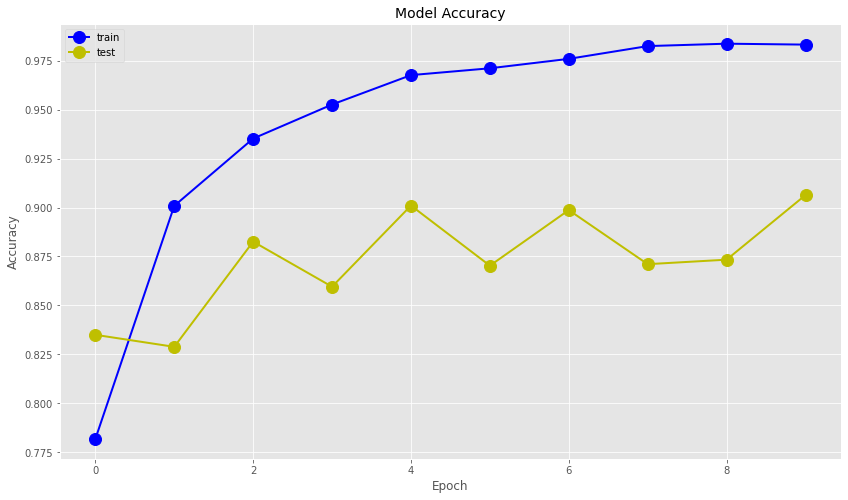

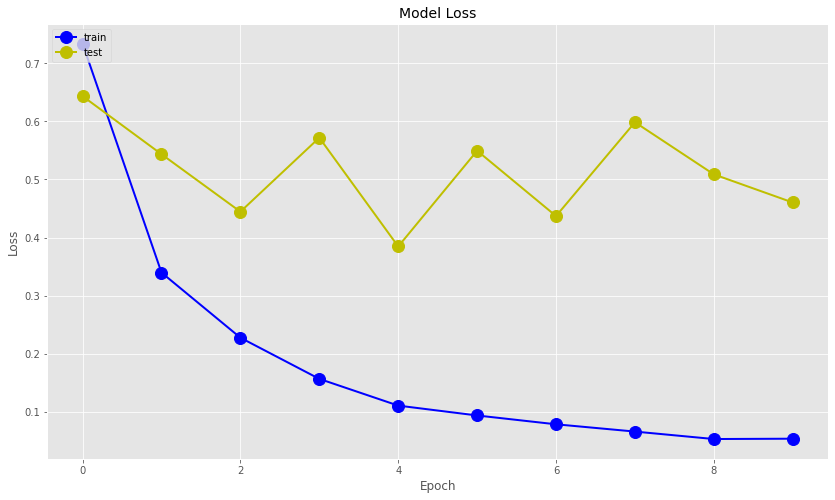

In [14]:
plt.figure(figsize=(14,8))
plt.plot(model_history.history['accuracy'], 'bo-', linewidth=2, markersize=12)
plt.plot(model_history.history['val_accuracy'], 'yo-', linewidth=2, markersize=12)
plt.title('Model Accuracy', fontsize=14)
plt.ylabel('Accuracy', fontsize=12)
plt.xlabel('Epoch', fontsize=12)
plt.legend(['train', 'test'], loc='upper left')
plt.show()

 # summarize history for loss
plt.figure(figsize=(14,8))
plt.plot(model_history.history['loss'], 'bo-', linewidth=2, markersize=12 )
plt.plot(model_history.history['val_loss'], 'yo-', linewidth=2, markersize=12)
plt.title('Model Loss', fontsize=14)
plt.ylabel('Loss',fontsize=12)
plt.xlabel('Epoch',fontsize=12)
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [15]:
target_names = []
for key in training_set.class_indices:
  target_names.append(key)

print(target_names)

['0Capri', '10Pachy', '12Phyll', '14Macro', '1Pnoep', '2Malac', '3Malac', '4Anthi', '5Anthr', '6Corvu', '7Dryoc', '8Elanu', '9Ortho']


41/41 [==============================] - 7s 160ms/step - loss: 0.4603 - accuracy: 0.9064
n Test_Accuracy:- 0.9063699245452881
confusion matrix
[[ 71   0   0   0   1   0   0   0   8   0   0   0   0]
 [  0  49   0   0   1   0   1   0   0   3   0   0   0]
 [  2   0 269   1   0   2   0   0   2   0   0   1   0]
 [  0   0   2 173   0   0   0   0   1   2   0   1   4]
 [  0   0   0   3 135   4   0   6   0   0   0   0   0]
 [  0   8   0   0   2  47   0   0   1   1   0   0   3]
 [  0   5   0   7   1   0  57   0   1   1   0   2   6]
 [  0   0   1   0   1   0   0  37   0   0   0   1   0]
 [  1   0   1   1   2   0   0   1  37   5   0   0   0]
 [  0   1   0   0   0   0   0   0   0  67   1   1   1]
 [  0   0   0   0   0   0   1   0   5   2  48   1   1]
 [  0   0   5   0   0   0   0   0   0   0   0 133   0]
 [  0   0   1   2   0   1   0   0   1   1   0   0  58]]


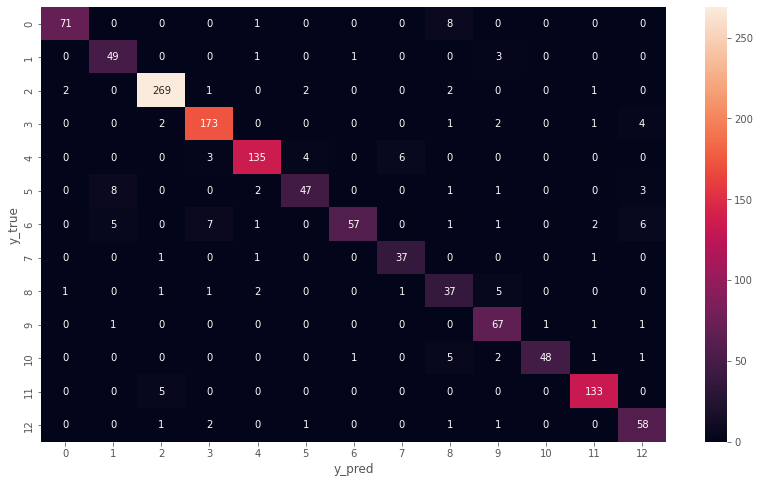

In [16]:
accuracy = model.evaluate(test_set)
print('n', 'Test_Accuracy:-', accuracy[1])
pred = model.predict(test_set)
y_pred = np.argmax(pred, axis=1)
#y_true = np.argmax(pred, axis=1)
print('confusion matrix')
print(confusion_matrix(test_set.classes, y_pred))
    #confusion matrix
f, ax = plt.subplots(figsize=(14,8))
sns.heatmap(confusion_matrix(test_set.classes, y_pred), annot=True, fmt=".0f", ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

In [17]:
print('Classification Report')
print(classification_report(test_set.classes, y_pred, target_names=target_names ))

Classification Report
              precision    recall  f1-score   support

      0Capri       0.96      0.89      0.92        80
     10Pachy       0.78      0.91      0.84        54
     12Phyll       0.96      0.97      0.97       277
     14Macro       0.93      0.95      0.94       183
      1Pnoep       0.94      0.91      0.93       148
      2Malac       0.87      0.76      0.81        62
      3Malac       0.97      0.71      0.82        80
      4Anthi       0.84      0.93      0.88        40
      5Anthr       0.66      0.77      0.71        48
      6Corvu       0.82      0.94      0.88        71
      7Dryoc       0.98      0.83      0.90        58
      8Elanu       0.95      0.96      0.96       138
      9Ortho       0.79      0.91      0.85        64

    accuracy                           0.91      1303
   macro avg       0.88      0.88      0.88      1303
weighted avg       0.91      0.91      0.91      1303



In [18]:
target_names1 = []
for key in test_set.class_indices:
  target_names1.append(key)

print(target_names1)

['0Capri', '10Pachy', '12Phyll', '14Macro', '1Pnoep', '2Malac', '3Malac', '4Anthi', '5Anthr', '6Corvu', '7Dryoc', '8Elanu', '9Ortho']


ROC AUC score: 0.9357431421325967


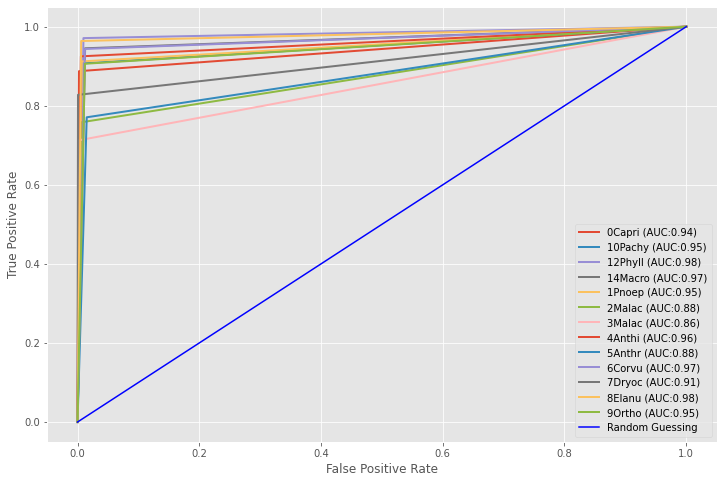

In [19]:
fig, c_ax = plt.subplots(1,1, figsize = (12, 8))

# function for scoring roc auc score for multi-class
def multiclass_roc_auc_score(y_test, y_preds, average="macro"):
    lb = LabelBinarizer()
    lb.fit(y_test)
    y_test = lb.transform(y_test)
    y_preds = lb.transform(y_pred)

    for (idx, c_label) in enumerate(target_names1):
        fpr, tpr, thresholds = roc_curve(y_test[:,idx].astype(int), y_preds[:,idx])
        c_ax.plot(fpr, tpr, label = '%s (AUC:%0.2f)'  % (c_label, auc(fpr, tpr)),linewidth=2)
    c_ax.plot(fpr, fpr, 'b-', label = 'Random Guessing')
    return roc_auc_score(y_test, y_preds, average=average)


print('ROC AUC score:', multiclass_roc_auc_score(test_set.classes, pred))

c_ax.legend()
c_ax.set_xlabel('False Positive Rate')
c_ax.set_ylabel('True Positive Rate')
plt.show()

In [20]:
top_k_accuracy_score(test_set.classes, pred, k=5)

0.9700690713737529

In [21]:
top_k_accuracy_score(test_set.classes, pred, k=5, normalize=False)

1264

In [22]:
top_k_accuracy_score(test_set.classes, pred, k=1)

0.906369915579432

In [23]:
top_k_accuracy_score(test_set.classes, pred, k=1, normalize=False)

1181

In [24]:
model.save('/content/drive/MyDrive/Birddata_split/m2_rmsprop_1.hdf5')

In [25]:
finalpreds = pd.DataFrame(y_pred)
#finalpreds.columns = sub_temp.columns
finalpreds.to_csv('/content/drive/MyDrive/Birddata_split/M2_rmsprop_1.csv',index=False)